# Phasor domain state estimation

In [1]:
from state_estimation_phasor import *

In [2]:
"""State estimation (bus injection model: V-I)"""
output_data_dir = '../temp/state_estimation_BIM'
measured_injections = {
    "bus_1014|bus_1015|bus_1016|bus_1017|bus_1019|bus_1020|bus_1027|bus_1029|bus_1030|bus_1031|bus_1032|bus_1033|bus_1037|bus_1038|bus_1053|bus_1199": 
        [{"element": "line_381", "sign": 1}],
    "bus_1118|bus_1119|bus_1120|bus_1127": 
        [{"element": "cb_146", "sign": -1}],
    "bus_1082|bus_1083|bus_1084": 
        [{"element": "cb_137", "sign": -1}],
    "bus_1097|bus_1098|bus_1099": 
        [{"element": "cb_140", "sign": -1}],
    "bus_1106|bus_1107|bus_1108": 
        [{"element": "cb_143", "sign": -1}],
    "bus_1069|bus_1070|bus_1071|bus_1078": 
        [{"element": "cb_134", "sign": -1}],
}
datetimespan = ('2024-11-14T07:00:00', '2024-11-14T07:05:00')
state_estimator = StateEstimator(
    network_files=[os.path.join(FILE_PATHS['net_files'], 'circuit3')], 
    input_data_dir=FILE_PATHS['phasors'],
    output_data_dir=output_data_dir,
    phase_ref='bus_1038.ag',
    delta_t_threshold=1.0,
)
state_estimator.state_estimation(
    datetimespan, 
    print_info=False,
    keep_cc=[0],
    prune_nodes=["bus_1130|bus_1142|bus_1144|bus_1146|bus_1147"],
    prune_edges=[],
    measured_injections=measured_injections,
    algorithm='businjection_VI',
)

Distinct topologies starting at the following timestamps: ['2024-11-13T23:30:42.000000']
dict_keys(['bus_1107.ag', 'bus_1107.bg', 'bus_1107.cg', 'cb_143.a', 'cb_143.b', 'cb_143.c', 'cb_143.n', 'bus_1113.ag', 'bus_1113.bg', 'bus_1113.cg', 'cb_145.a', 'cb_145.b', 'cb_145.c', 'cb_145.n', 'bus_1134.ag', 'bus_1134.bg', 'bus_1134.cg', 'cb_149.a', 'cb_149.b', 'cb_149.c', 'bus_1140.ag', 'bus_1140.bg', 'bus_1140.cg', 'cb_151.a', 'cb_151.b', 'cb_151.c', 'bus_1119.ag', 'bus_1119.bg', 'bus_1119.cg', 'cb_146.a', 'cb_146.b', 'cb_146.c', 'bus_1125.ag', 'bus_1125.bg', 'bus_1125.cg', 'cb_148.a', 'cb_148.b', 'cb_148.c', 'bus_1083.ag', 'bus_1083.bg', 'bus_1083.cg', 'cb_137.a', 'cb_137.b', 'cb_137.c', 'bus_1089.ag', 'bus_1089.bg', 'bus_1089.cg', 'cb_139.a', 'cb_139.b', 'cb_139.c', 'bus_1070.ag', 'bus_1070.bg', 'bus_1070.cg', 'cb_134.a', 'cb_134.b', 'cb_134.c', 'bus_1076.ag', 'bus_1076.bg', 'bus_1076.cg', 'cb_136.a', 'cb_136.b', 'cb_136.c', 'bus_1098.ag', 'bus_1098.bg', 'bus_1098.cg', 'cb_140.a', 'cb_140.b

100%|██████████| 25/25 [00:00<00:00, 111.03it/s]


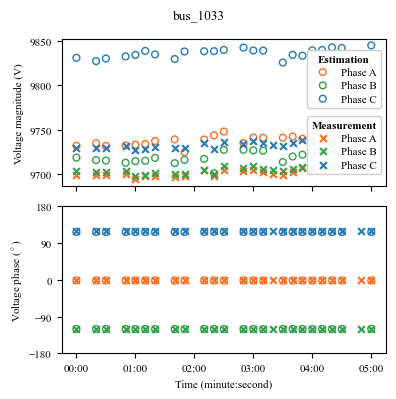

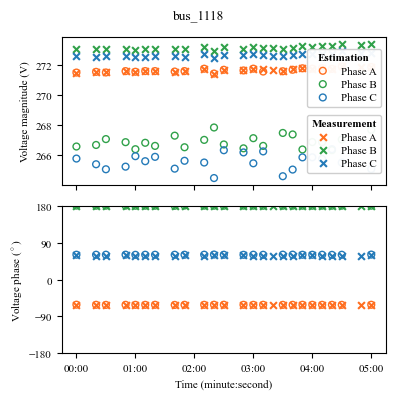

[Warning] No data found for bus_1118|bus_1119|bus_1120|bus_1127-I
[Warning] No data found for bus_1082|bus_1083|bus_1084-I


In [5]:
# Plotting
# Voltages
elements_to_plot = ['bus_1033', 'bus_1118', ] # 'bus_1034', 'bus_1082', 'bus_1097', 'bus_1106', 'bus_1069'
elements_to_plot += ["bus_1118|bus_1119|bus_1120|bus_1127-I", "bus_1082|bus_1083|bus_1084-I", ] # "bus_1027|bus_1029|bus_1031|bus_1019|bus_1030|bus_1199|bus_1015|bus_1014|bus_1016|bus_1032|bus_1053|bus_1037|bus_1017|bus_1020|bus_1038|bus_1033-I", "bus_1097|bus_1098|bus_1099-I", "bus_1106|bus_1107|bus_1108-I", "bus_1069|bus_1070|bus_1071|bus_1078-I"
plot_results(output_data_dir, datetimespan, '2024-11-13T23:30:42.000000.json', elements_to_plot, base_figsize=(4, 2), fontsize=8, combine_3_phase=True)
print_results(output_data_dir, datetimespan)

Distinct topologies starting at the following timestamps: ['2024-11-13T23:30:42.000000']


 64%|██████▍   | 16/25 [00:04<00:02,  3.65it/s]

Error at 2024-11-14T07:03:20.000000: Solver 'CLARABEL' failed. Try another solver, or solve with verbose=True for more information.


 96%|█████████▌| 24/25 [00:06<00:00,  3.80it/s]

Error at 2024-11-14T07:04:50.000000: Solver 'CLARABEL' failed. Try another solver, or solve with verbose=True for more information.


100%|██████████| 25/25 [00:07<00:00,  3.44it/s]


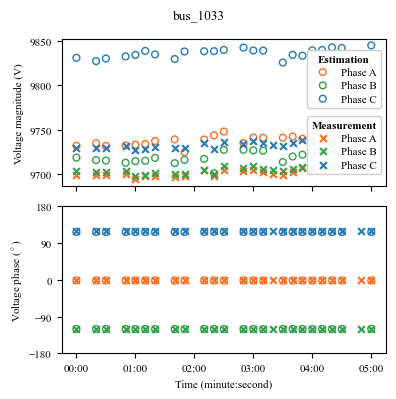

[Warning] No ground truth measurement data for bus_1034.


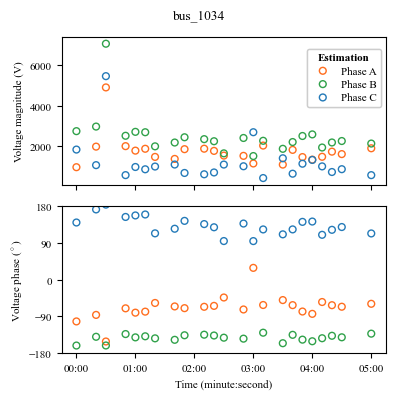

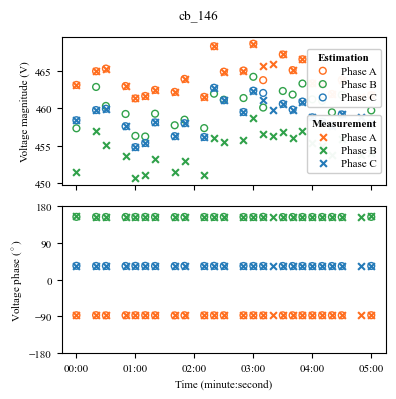

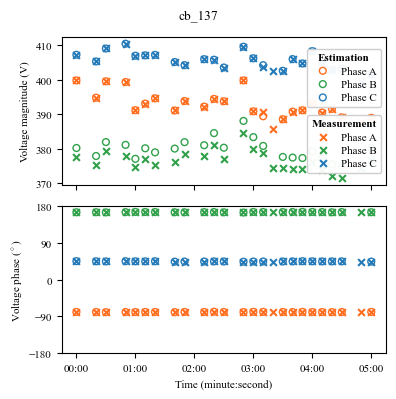

In [6]:
"""State estimation (branch flow model: V-I)"""
output_data_dir = '../temp/state_estimation_BFM'
datetimespan = ('2024-11-14T07:00:00', '2024-11-14T07:05:00')
state_estimator = StateEstimator(
    network_files=[os.path.join(FILE_PATHS['net_files'], 'circuit3')], 
    input_data_dir=FILE_PATHS['phasors'],
    output_data_dir=output_data_dir,
    phase_ref='bus_1038.ag',
    delta_t_threshold=1.0,
)
state_estimator.state_estimation(datetimespan, print_info=False)
elements_to_plot = ['bus_1033', 'bus_1034', ] # 'bus_1118', 'bus_1082', 'bus_1097', 'bus_1106', 'bus_1069'
elements_to_plot += ["cb_146", "cb_137", ] # 'line_381', "cb_140", "cb_143", "cb_134"
plot_results(output_data_dir, datetimespan, '2024-11-13T23:30:42.000000.json', elements_to_plot, base_figsize=(4, 2), fontsize=8, combine_3_phase=True)
print_results(output_data_dir, datetimespan)